In [1]:
import pandas as pd
import numpy as np

#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [2]:
df = df.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [3]:
df['ASF'] = df['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [4]:
print(df.shape)
print(df.dtypes)

(216, 9)
M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object


## SMOTE

In [5]:
#https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'CDR']
y = df.loc[:, df.columns == 'CDR']

os = SMOTE(random_state=0, k_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

#os_data_X = df_2[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
#os_data_y= df_2[['CDR']]

os_data_X = pd.DataFrame(data=os_data_X,columns= ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'])
os_data_y= pd.DataFrame(data=os_data_y,columns=['CDR']) #CDR because is our target variable

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Nondementia in oversampled data",len(os_data_y[os_data_y['CDR']==0]))
print("Number of Very Mild Dementia",len(os_data_y[os_data_y['CDR']==3]))
print("Number of Moderate Dementia",len(os_data_y[os_data_y['CDR']==2]))
print("Number of Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Proportion of Nondementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==0])/len(os_data_X))
print("Proportion of Very Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==3])/len(os_data_X))
print("Proportion of Moderate Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==2])/len(os_data_X))
print("Proportion of Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))

length of oversampled data is  364
Number of Nondementia in oversampled data 91
Number of Very Mild Dementia 91
Number of Moderate Dementia 91
Number of Mild Dementia 91
Proportion of Nondementia in oversampled data is  0.25
Proportion of Very Mild Dementia in oversampled data is  0.25
Proportion of Moderate Dementia in oversampled data is  0.25
Proportion of Mild Dementia in oversampled data is  0.25


In [6]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([os_data_X, os_data_y], axis=1)
horizontal_stack

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR
0,1,70,5,1,30,1660,0.739000,1.057000,0
1,0,88,2,3,28,1370,0.765000,1.281000,0
2,0,78,1,5,23,1462,0.697000,1.200000,2
3,1,90,2,3,25,1301,0.645000,1.349000,0
4,1,80,2,4,20,1494,0.665000,1.175000,2
...,...,...,...,...,...,...,...,...,...
359,0,83,1,3,15,1480,0.675944,1.187495,3
360,0,82,1,3,15,1469,0.679572,1.196279,3
361,0,80,2,3,15,1428,0.693468,1.229924,3
362,0,78,2,3,15,1414,0.698381,1.241818,3


# Simple SVM 

In [7]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

### splitting target variable from horizontal_stack

In [8]:
df = pd.DataFrame(data=horizontal_stack, columns=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR'] ) #it trasforms a numpy array in a pandas dataframe
df.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR
0,1,70,5,1,30,1660,0.739,1.057,0
1,0,88,2,3,28,1370,0.765,1.281,0
2,0,78,1,5,23,1462,0.697,1.200,2
3,1,90,2,3,25,1301,0.645,1.349,0
4,1,80,2,4,20,1494,0.665,1.175,2


In [9]:
X = df.iloc[:, :8] #to gain dataframe without CDR column
X.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,1,70,5,1,30,1660,0.739,1.057
1,0,88,2,3,28,1370,0.765,1.281
2,0,78,1,5,23,1462,0.697,1.200
3,1,90,2,3,25,1301,0.645,1.349
4,1,80,2,4,20,1494,0.665,1.175


In [10]:
y = df.iloc[:, 8:] #to gain dataframe without CDR column
#y.head()
y = y.squeeze() #to transform a column-vector in a 1d array

In [11]:
X_encoded = pd.get_dummies(X, columns = ['M/F', 'Educ', 'SES'])
X_encoded.head()

,Age,MMSE,eTIV,nWBV,ASF,M/F_0,M/F_1,Educ_1,Educ_2,Educ_3,Educ_4,Educ_5,SES_1,SES_2,SES_3,SES_4,SES_5
0,70,30,1660,0.739,1.057,0,1,0,0,0,0,1,1,0,0,0,0
1,88,28,1370,0.765,1.281,1,0,0,1,0,0,0,0,0,1,0,0
2,78,23,1462,0.697,1.200,1,0,1,0,0,0,0,0,0,0,0,1
3,90,25,1301,0.645,1.349,0,1,0,1,0,0,0,0,0,1,0,0
4,80,20,1494,0.665,1.175,0,1,0,1,0,0,0,0,0,0,1,0


In [12]:
#y_encoded = pd.get_dummies(y, columns = ['CDR'])
#y_encoded.head()

In [13]:
#y_encoded = y_encoded.squeeze()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.30)

In [15]:
#to implement Radial Basis Function variables are supposed to be scaled and centered
from sklearn.preprocessing import scale

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svclassifier = SVC(kernel='linear', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78        33
           1       0.56      0.54      0.55        26
           2       0.75      0.90      0.82        20
           3       1.00      0.97      0.98        31

    accuracy                           0.79       110
   macro avg       0.78      0.79      0.78       110
weighted avg       0.79      0.79      0.79       110



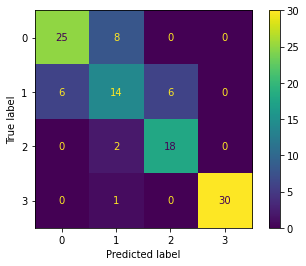

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

# Kernel SVM


## Polynomial Kernel

In [18]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.30      0.44        33
           1       0.62      0.31      0.41        26
           2       0.69      0.55      0.61        20
           3       0.45      1.00      0.62        31

    accuracy                           0.55       110
   macro avg       0.65      0.54      0.52       110
weighted avg       0.65      0.55      0.52       110



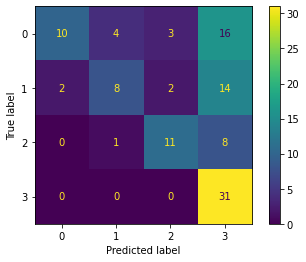

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

## Gaussian Kernel

In [20]:
svclassifier = SVC(kernel='rbf', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66        33
           1       0.59      0.50      0.54        26
           2       0.63      0.95      0.76        20
           3       1.00      0.97      0.98        31

    accuracy                           0.75       110
   macro avg       0.73      0.76      0.74       110
weighted avg       0.75      0.75      0.74       110



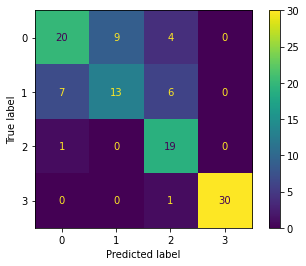

In [21]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

## Sigmoid Kernel


In [22]:
svclassifier = SVC(kernel='sigmoid', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        33
           1       0.48      0.50      0.49        26
           2       0.59      0.65      0.62        20
           3       0.94      0.97      0.95        31

    accuracy                           0.71       110
   macro avg       0.69      0.70      0.69       110
weighted avg       0.71      0.71      0.71       110



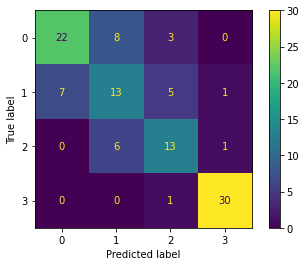

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

## Cross Validation to optimize parameters

In [24]:
# https://www.youtube.com/watch?v=8A7L0GsBiLQ&ab_channel=StatQuestwithJoshStarmer

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.5, 1, 10, 100], 
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]

optimal_parameters = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)

optimal_parameters.fit(X_train_scaled, y_train)
print(optimal_parameters.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [26]:
svclassifier = SVC(kernel='linear', random_state = 0, C = 10, gamma = 'scale')
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        33
           1       0.56      0.58      0.57        26
           2       0.78      0.90      0.84        20
           3       1.00      0.97      0.98        31

    accuracy                           0.79       110
   macro avg       0.78      0.79      0.79       110
weighted avg       0.80      0.79      0.79       110



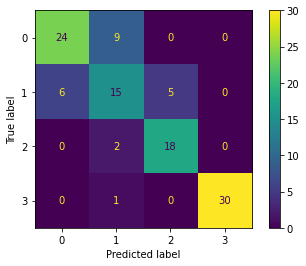

In [27]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd') #, display_labels = ['0', '1', '2', '3'])

# Kernel SVM

## Polynomial Kernel 

In [28]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0, C = 10, gamma = 'scale')
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = 0)) #zero_division problem

              precision    recall  f1-score   support

           0       0.73      0.33      0.46        33
           1       0.47      0.35      0.40        26
           2       0.57      0.65      0.60        20
           3       0.57      0.97      0.71        31

    accuracy                           0.57       110
   macro avg       0.58      0.57      0.54       110
weighted avg       0.59      0.57      0.54       110



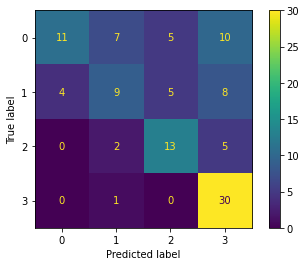

In [29]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

## Gaussian Kernel

In [30]:
svclassifier = SVC(kernel='rbf', random_state = 0, C = 10, gamma = 'scale')
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.65      0.50      0.57        26
           2       0.62      0.90      0.73        20
           3       1.00      0.97      0.98        31

    accuracy                           0.76       110
   macro avg       0.75      0.77      0.75       110
weighted avg       0.77      0.76      0.76       110



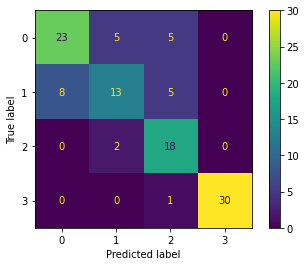

In [31]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

## Sigmoid Kernel

In [32]:
svclassifier = SVC(kernel='sigmoid', random_state = 0, C = 10, gamma = 'scale')
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        33
           1       0.38      0.50      0.43        26
           2       0.58      0.55      0.56        20
           3       1.00      0.97      0.98        31

    accuracy                           0.67       110
   macro avg       0.68      0.66      0.66       110
weighted avg       0.70      0.67      0.68       110



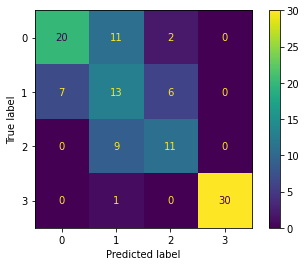

In [33]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '2', '3'])

#### to try to improve results we merged labels 2 and 3

In [34]:
#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = r'C:\Users\italo\OneDrive\Desktop\alzheimer'
file = 'our_merged_dataset.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(216, 12)


,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [35]:
df = df.drop(columns = ['Hand', 'Delay', 'ID']) #we dropped these two variables becauese are useless
df.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,74,2,3,29,0,1344,0.743,"1,306"
1,0,55,4,1,29,0,1147,0.810,"1,531"
2,0,73,4,3,27,1,1454,0.708,"1,207"
3,1,74,5,2,30,0,1636,0.689,"1,073"
4,0,52,3,2,30,0,1321,0.827,"1,329"


In [36]:
df['ASF'] = df['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [37]:
print(df.shape)
print(df.dtypes)

(216, 9)
M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object


## SMOTE

In [38]:
X = df.loc[:, df.columns != 'CDR']
y = df.loc[:, df.columns == 'CDR']

os = SMOTE(random_state=0, k_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

#os_data_X = df_2[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
#os_data_y= df_2[['CDR']]

os_data_X = pd.DataFrame(data=os_data_X,columns= ['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF'])
os_data_y= pd.DataFrame(data=os_data_y,columns=['CDR']) #CDR because is our target variable

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Nondementia in oversampled data",len(os_data_y[os_data_y['CDR']==0]))
print("Number of Very Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Number of Mild and Moderate Dementia",len(os_data_y[os_data_y['CDR']==4]))
#print("Number of Mild Dementia",len(os_data_y[os_data_y['CDR']==1]))
print("Proportion of Nondementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==0])/len(os_data_X))
print("Proportion of Very Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))
print("Proportion of Mild and Moderate Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==4])/len(os_data_X))
#print("Proportion of Mild Dementia in oversampled data is ",len(os_data_y[os_data_y['CDR']==1])/len(os_data_X))

length of oversampled data is  273
Number of Nondementia in oversampled data 91
Number of Very Mild Dementia 91
Number of Mild and Moderate Dementia 91
Proportion of Nondementia in oversampled data is  0.3333333333333333
Proportion of Very Mild Dementia in oversampled data is  0.3333333333333333
Proportion of Mild and Moderate Dementia in oversampled data is  0.3333333333333333


In [39]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([os_data_X, os_data_y], axis=1)
horizontal_stack

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR
0,1,70,5,1,30,1660,0.739000,1.057000,0
1,0,88,2,3,28,1370,0.765000,1.281000,0
2,0,78,1,5,23,1462,0.697000,1.200000,4
3,1,90,2,3,25,1301,0.645000,1.349000,0
4,1,80,2,4,20,1494,0.665000,1.175000,4
...,...,...,...,...,...,...,...,...,...
268,0,86,1,3,21,1500,0.671172,1.169817,4
269,0,79,3,1,20,1726,0.713215,1.016382,4
270,0,72,3,2,21,1491,0.688077,1.176824,4
271,1,75,2,2,21,1634,0.738562,1.073963,4


# Simple SVM 

In [40]:
### splitting target variable from horizontal_stack

In [41]:
df = pd.DataFrame(data=horizontal_stack, columns=['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF', 'CDR'] ) #it trasforms a numpy array in a pandas dataframe
df.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR
0,1,70,5,1,30,1660,0.739,1.057,0
1,0,88,2,3,28,1370,0.765,1.281,0
2,0,78,1,5,23,1462,0.697,1.200,4
3,1,90,2,3,25,1301,0.645,1.349,0
4,1,80,2,4,20,1494,0.665,1.175,4


In [42]:
X = df.iloc[:, :8] #to gain dataframe without CDR column
X.head()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,1,70,5,1,30,1660,0.739,1.057
1,0,88,2,3,28,1370,0.765,1.281
2,0,78,1,5,23,1462,0.697,1.200
3,1,90,2,3,25,1301,0.645,1.349
4,1,80,2,4,20,1494,0.665,1.175


In [43]:
y = df.iloc[:, 8:] #to gain dataframe without CDR column
#y.head()
y = y.squeeze() #to transform a column-vector in a 1d array

In [44]:
X_encoded = pd.get_dummies(X, columns = ['M/F', 'Educ', 'SES'])
X_encoded.head()

,Age,MMSE,eTIV,nWBV,ASF,M/F_0,M/F_1,Educ_1,Educ_2,Educ_3,Educ_4,Educ_5,SES_1,SES_2,SES_3,SES_4,SES_5
0,70,30,1660,0.739,1.057,0,1,0,0,0,0,1,1,0,0,0,0
1,88,28,1370,0.765,1.281,1,0,0,1,0,0,0,0,0,1,0,0
2,78,23,1462,0.697,1.200,1,0,1,0,0,0,0,0,0,0,0,1
3,90,25,1301,0.645,1.349,0,1,0,1,0,0,0,0,0,1,0,0
4,80,20,1494,0.665,1.175,0,1,0,1,0,0,0,0,0,0,1,0


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.30)

In [46]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [47]:
svclassifier = SVC(kernel='linear', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76        23
           1       0.54      0.52      0.53        25
           4       0.92      0.71      0.80        34

    accuracy                           0.71        82
   macro avg       0.71      0.71      0.70        82
weighted avg       0.73      0.71      0.71        82



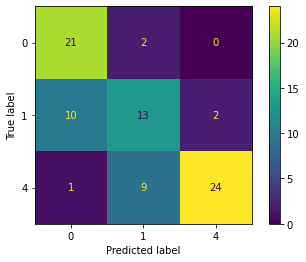

In [48]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

# Kernel SVM


## Polynomial Kernel

In [49]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.30      0.42        23
           1       0.46      0.84      0.59        25
           4       0.92      0.71      0.80        34

    accuracy                           0.63        82
   macro avg       0.69      0.62      0.61        82
weighted avg       0.72      0.63      0.63        82



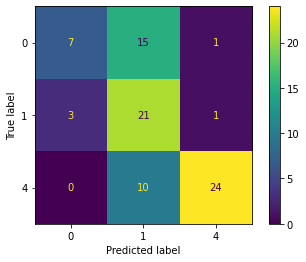

In [50]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Gaussian Kernel

In [51]:
svclassifier = SVC(kernel='rbf', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78        23
           1       0.63      0.68      0.65        25
           4       0.93      0.74      0.82        34

    accuracy                           0.76        82
   macro avg       0.76      0.76      0.75        82
weighted avg       0.78      0.76      0.76        82



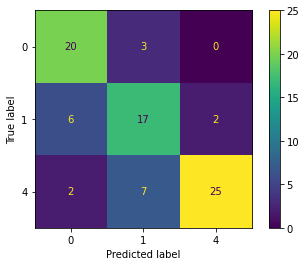

In [52]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Sigmoid Kernel


In [53]:
svclassifier = SVC(kernel='sigmoid', random_state = 0)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        23
           1       0.52      0.52      0.52        25
           4       0.85      0.68      0.75        34

    accuracy                           0.70        82
   macro avg       0.69      0.70      0.69        82
weighted avg       0.71      0.70      0.69        82



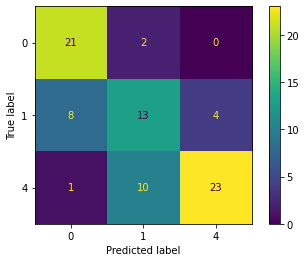

In [54]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Cross Validation to optimize parameters

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C': [0.5, 1, 10, 100], 
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
]

optimal_parameters = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'accuracy', verbose = 0)

optimal_parameters.fit(X_train_scaled, y_train)
print(optimal_parameters.best_params_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


# Simple SVM

In [56]:
svclassifier = SVC(kernel='linear', random_state = 0, C = 100, gamma = 0.01)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76        23
           1       0.52      0.52      0.52        25
           4       0.92      0.68      0.78        34

    accuracy                           0.70        82
   macro avg       0.70      0.70      0.69        82
weighted avg       0.72      0.70      0.70        82



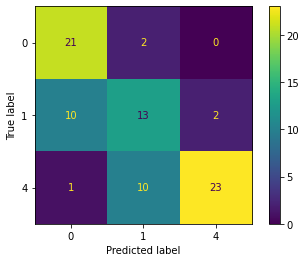

In [57]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

# Kernel SVM

## Polynomial Kernel 


In [58]:
svclassifier = SVC(kernel='poly', degree=8, random_state = 0, C = 100, gamma = 0.01)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = 0)) #zero_division problem

              precision    recall  f1-score   support

           0       0.28      1.00      0.44        23
           1       0.00      0.00      0.00        25
           4       0.00      0.00      0.00        34

    accuracy                           0.28        82
   macro avg       0.09      0.33      0.15        82
weighted avg       0.08      0.28      0.12        82



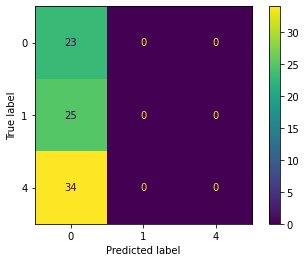

In [59]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Gaussian Kernel

In [60]:
svclassifier = SVC(kernel='rbf', random_state = 0, C = 100, gamma = 0.01)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74        23
           1       0.54      0.60      0.57        25
           4       0.96      0.65      0.77        34

    accuracy                           0.70        82
   macro avg       0.71      0.71      0.69        82
weighted avg       0.74      0.70      0.70        82



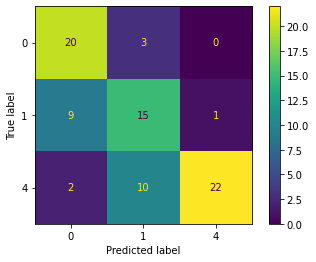

In [61]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])

## Sigmoid Kernel

In [62]:
svclassifier = SVC(kernel='sigmoid', random_state = 0, C = 100, gamma = 0.01)
svclassifier.fit(X_train_scaled, y_train)
y_pred = svclassifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.65      0.87      0.74        23
           1       0.48      0.56      0.52        25
           4       0.95      0.62      0.75        34

    accuracy                           0.67        82
   macro avg       0.69      0.68      0.67        82
weighted avg       0.72      0.67      0.68        82



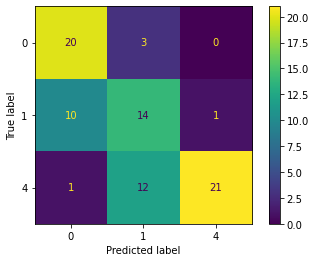

In [63]:
plot_confusion_matrix(svclassifier, X_test_scaled, y_test, values_format = 'd', display_labels = ['0', '1', '4'])